In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
code_path = os.path.abspath('../code')

# Add the path to sys.path
if code_path not in sys.path:
    sys.path.append(code_path)

In [3]:
from week4 import particle
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

In [4]:
my_particle = particle(ymax=2, vmax=2, m=0.5)
G = my_particle.build_prm(N=100, radius=1)

In [7]:
from matplotlib.patches import FancyArrowPatch

def visualize_prm(G, particle, title='PRM Graph'):
    """
    Visualize the PRM graph.

    Parameters:
        G (networkx.DiGraph): The directed PRM graph.
        particle: An object containing ymax and vmax attributes to set plot limits.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel('Position (y)')
    plt.ylabel('Velocity (v)')

    # Draw edges with arrows for directed graph
    for s1, s2 in G.edges():
        # Extract node positions
        pos1 = s1
        pos2 = s2
        
        # Add arrow between nodes
        arrow = FancyArrowPatch(
            pos1, pos2, color='b', arrowstyle='->', alpha=0.3, mutation_scale=10
        )
        plt.gca().add_patch(arrow)

    # Draw nodes
    y_vals = [s for s in G.nodes]
    v_vals = [s for s in G.nodes]
    plt.scatter(y_vals, v_vals, c='r', s=10)

    # Set limits
    plt.xlim(-particle.ymax - 1, particle.ymax + 1)
    plt.ylim(-particle.vmax - 1, particle.vmax + 1)
    plt.grid(True)
    plt.show()


KeyError: 'pos'

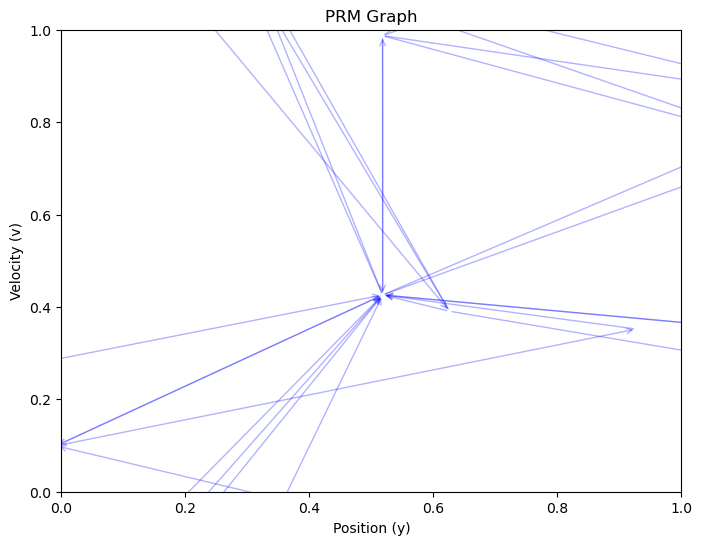

In [8]:
visualize_prm(G, my_particle)